## Logistic Regression Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## step 1: Generate binary classification data
np.random.seed(42)
n_samples = 100
n_features = 2

X = np.random.randn(n_samples, n_features)

# True weights and bias
true_w = np.array([[2], [-3]])
true_b = 0.5

linear_combination = X @ true_w + true_b
probabilities = 1 / (1 + np.exp(-linear_combination))
y = (probabilities > 0.5).astype(int)


In [8]:
## step 2: Shuffle and split into Train (60%), Val (20%), Test (20%)
indices = np.arange(n_samples)
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_end = int(0.6 * n_samples)
val_end = int(0.8 * n_samples)

X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

In [9]:
## step 3: Initialize
w = np.random.randn(n_features, 1)
b = 0.0
learning_rate = 0.1
n_iterations = 1000
m = X_train.shape[0]

train_loss_history = []
val_loss_history = []

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
## step 4: Training loop
for i in range(n_iterations):
    # --- Training ---
    z = X_train @ w + b
    y_pred = sigmoid(z)
    loss = -(1/m) * np.sum(y_train * np.log(y_pred + 1e-8) + (1 - y_train) * np.log(1 - y_pred + 1e-8))
    train_loss_history.append(loss)

    dz = y_pred - y_train
    dw = (1/m) * X_train.T @ dz
    db = (1/m) * np.sum(dz)

    w -= learning_rate * dw
    b -= learning_rate * db

    # --- Validation loss ---
    z_val = X_val @ w + b
    y_val_pred = sigmoid(z_val)
    val_loss = -(1/len(y_val)) * np.sum(y_val * np.log(y_val_pred + 1e-8) + (1 - y_val) * np.log(1 - y_val_pred + 1e-8))
    val_loss_history.append(val_loss)

    if i % 100 == 0:
        print(f"Iter {i}: Train Loss = {loss:.4f} | Val Loss = {val_loss:.4f}")

Iter 0: Train Loss = 0.8472 | Val Loss = 0.8740
Iter 100: Train Loss = 0.2802 | Val Loss = 0.3316
Iter 200: Train Loss = 0.2147 | Val Loss = 0.2601
Iter 300: Train Loss = 0.1858 | Val Loss = 0.2268
Iter 400: Train Loss = 0.1683 | Val Loss = 0.2061
Iter 500: Train Loss = 0.1563 | Val Loss = 0.1915
Iter 600: Train Loss = 0.1473 | Val Loss = 0.1803
Iter 700: Train Loss = 0.1402 | Val Loss = 0.1715
Iter 800: Train Loss = 0.1344 | Val Loss = 0.1642
Iter 900: Train Loss = 0.1295 | Val Loss = 0.1580


In [11]:
## step 5: Evaluate on test set
def predict(X, w, b, threshold=0.5):
    return (sigmoid(X @ w + b) > threshold).astype(int)

y_test_pred = predict(X_test, w, b)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")


Final Test Accuracy: 100.00%


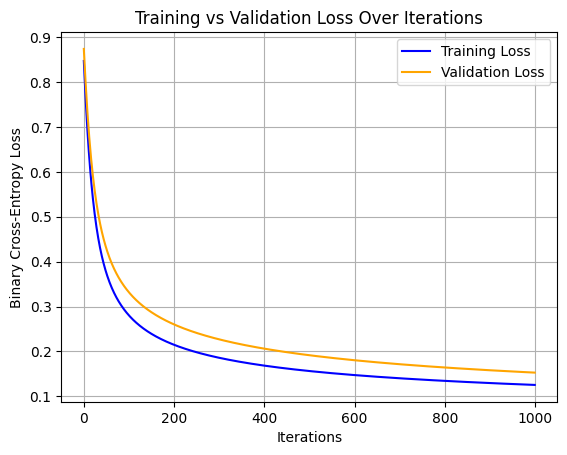

In [12]:
## step 6: Plot Training vs Validation Loss
plt.plot(train_loss_history, label='Training Loss', color='blue')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training vs Validation Loss Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

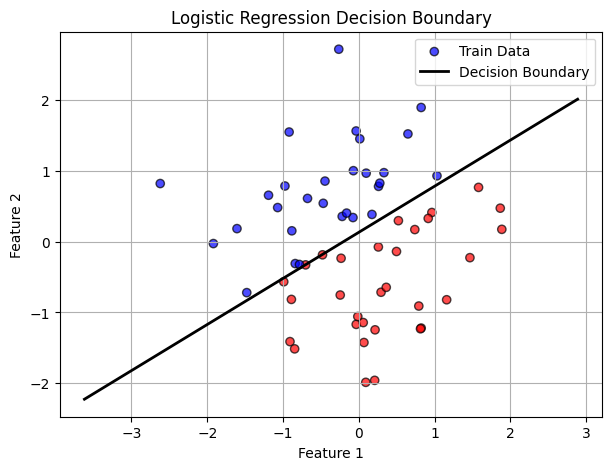

In [13]:
## step 7: Plot decision boundary
plt.figure(figsize=(7, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap='bwr', alpha=0.7, edgecolor='k', label='Train Data')
x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_vals = -(w[0]/w[1]) * x1_vals - b/w[1]
plt.plot(x1_vals, x2_vals.flatten(), 'k-', linewidth=2, label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()